# ML Regression and Regularization

points to discuss/present

- definition of regression
- table with classifiers and regressors
- commons with statistics (OLS) and the ML in regression (trian test)
- start by presenting a simple linear problem and the fact that the mathods try to calculate the weights
- show the least squares / linear fit model
- give definition of regularization 
- discuss ridge, lasso



# Example of Linear Regression with Ridge and Lasso

This is a modified version of a [sklearn example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#from scipy.stats import lognorm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split


> Running ols with LinearRegression()
> Running ridge with Ridge(alpha=0.1)
> Running lasso with Lasso(alpha=0.001)


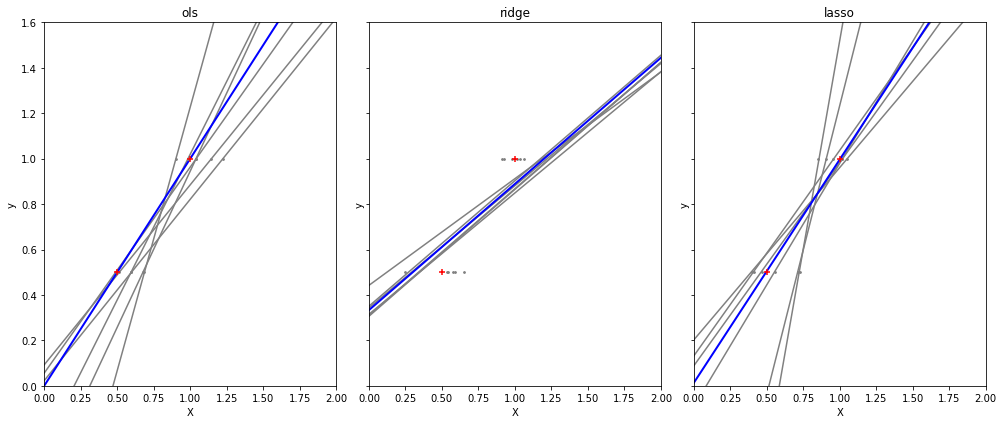

In [2]:
X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=LinearRegression(), ridge=Ridge(0.1), lasso=Lasso(0.001)
)

fig, axes = plt.subplots(1,3, sharey=True, figsize=(14,6))

for k, ax in enumerate(axes.reshape(-1)):
    name = list(classifiers.keys())[k]
    clf = list(classifiers.values())[k]
    print(f'> Running {name} with {clf}')

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

fig.tight_layout()

plt.show()

### Q. What do you notice? 

- Due to the few points the OLS fits can vary to show higer variance.
Every line’s slope can vary quite a bit for each prediction due to the noise induced in the observations.

Ridge regression is basically minimizing a penalised version of the least-squared function. The penalising shrinks the value of the regression coefficients. Despite the few data points in each dimension, the slope of the prediction is much more stable and the variance in the line itself is greatly reduced, in comparison to that of the standard linear regression

## EXERCISE: HECATE

load data, plot, fit with linear ridge, lasso (optional kfold ?) 
problem to work with ...

In [3]:
dfile = "data/HECATE_V_D.csv"

data = np.genfromtxt(dfile, dtype=None, 
                     comments='#', delimiter=',', 
                     names=True, autostrip='Yes',
                     unpack=True )
#examine data
print("Let us see what we have:\n")
print("The column names:")
print(data.dtype.names)
print("-"*25)

Let us see what we have:

The column names:
('PGC', 'OBJNAME', 'V', 'V_VIR', 'MOD', 'MOD_ERR', 'D', 'D_ERR')
-------------------------


/home/grigoris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


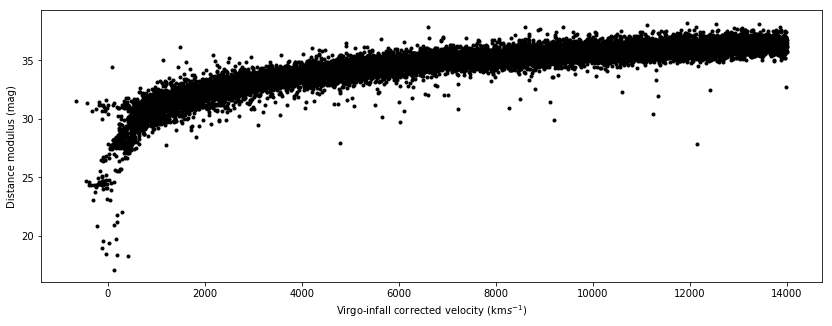

In [4]:
def pltlabels():
    """
    Convenience function to plot the x and y axis labels
    """
    plt.xlabel('Virgo-infall corrected velocity (km$s^{-1}$)')
    plt.ylabel('Distance modulus (mag)')


# using 'V_VIR' as input x and 'MOD' as an ouput y 
X = data['V_VIR'].reshape(-1, 1)  # or [:, np.newaxis] or [:, None]
y = data['MOD']


fig = plt.figure(figsize=(14,5))
plt.scatter(X, y, c='k', marker='.')

pltlabels()
plt.show()

Selecting a subsample for illustration purposes (using indecs)

In [5]:
import random

minX = 2000
maxX = 14000
rand = 100

random.seed(134)
range_indcs = np.where( (X>minX) & (X<maxX) )[0]
sel_indcs = random.sample(list(range_indcs), rand)   # sample from the previous range

print(f'The full length of X is {len(X)} points,')
print(f'while there are {len(range_indcs)} in the range {minX}-{maxX}.')
print(f'We randomly select {rand} of them:')
print(sel_indcs)
print()


The full length of X is 21174 points,
while there are 18700 in the range 2000-14000.
We randomly select 100 of them:
[18337, 19615, 8984, 20733, 6621, 3266, 18400, 6087, 15186, 9805, 18547, 10632, 20358, 17403, 3396, 5832, 11889, 19391, 11506, 12420, 4664, 11074, 14981, 14199, 10986, 14231, 7077, 19572, 15284, 11917, 12310, 18953, 13245, 4009, 4629, 15339, 9773, 10505, 6973, 5697, 8284, 5637, 14121, 10103, 11117, 12956, 16308, 9045, 10754, 7518, 2485, 15392, 8421, 8670, 14639, 5280, 19781, 19158, 4855, 7880, 4864, 5993, 15715, 9712, 8457, 9168, 7933, 19623, 19231, 5911, 8913, 13005, 14220, 19049, 15029, 9972, 12867, 2454, 5047, 7848, 16600, 18711, 19465, 5344, 3874, 13920, 2032, 4227, 13942, 16060, 8420, 780, 10588, 17524, 10177, 10966, 18767, 4415, 3314, 20483]



In [6]:
# X_train, X_test, y_train, y_test = train_test_split(X[sel_indcs], y[sel_indcs],
#                         test_size=0.2) #, random_state=42) 

X_train, X_test, y_train, y_test = train_test_split(X[sel_indcs], y[sel_indcs],
                        test_size=0.3) #, random_state=42) 

print(f'- From {len(X)} sources:')
print(f'   {len(X_train)} (train)')
print(f'   {len(X_test)} (test)') 

- From 21174 sources:
   70 (train)
   30 (test)


Score for the training set: 0.7527
Score for the test set: 0.6913


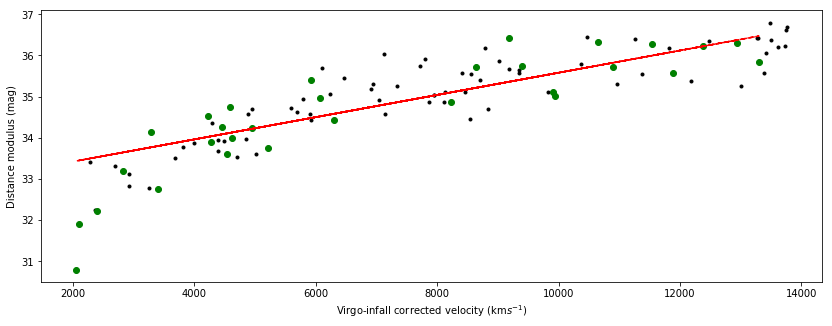

In [7]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'Score for the training set: {reg.score(X_train, y_train):0.4f}')
print(f'Score for the test set: {reg.score(X_test, y_test):0.4f}')

# find the parameters of the fit
# print(reg.coef_)
# print(reg.intercept_)

fig = plt.figure(figsize=(14,5))

plt.plot(X_train, y_train, 'k.', label='train')
plt.plot(X_test, y_test, 'go', label='test' ) 
plt.plot(X_test, y_pred, '--r', label='model' ) 

pltlabels()
plt.show() 

-- iteration 1 with coef: 0.000277
-- iteration 2 with coef: 0.000306
-- iteration 3 with coef: 0.000298
-- iteration 4 with coef: 0.000303
-- iteration 5 with coef: 0.000293
-- iteration 6 with coef: 0.000300
-- iteration 7 with coef: 0.000303
-- iteration 8 with coef: 0.000288
-- iteration 9 with coef: 0.000296
-- iteration 10 with coef: 0.000277


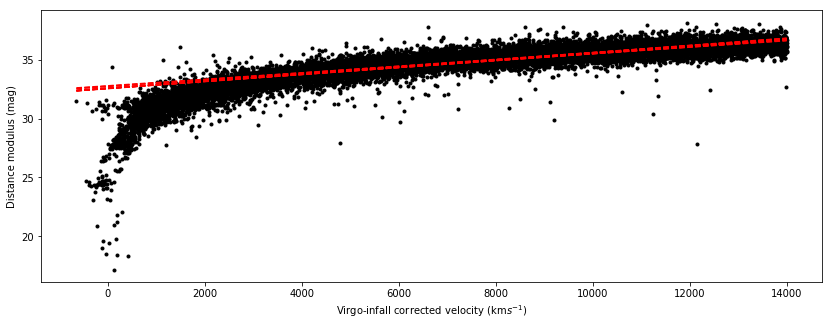

In [8]:
fig = plt.figure(figsize=(14,5))

# for improved illustration of the model
X_plot = np.linspace(min(X), max(X), 100)

plt.plot(X, y, 'k.')
for i in range(10):
    iX_train, iX_test, iy_train, iy_test = train_test_split(X[sel_indcs], y[sel_indcs],
                        test_size=0.3) 
#     iX_train, iX_test, iy_train, iy_test = train_test_split(X, y,
#                         test_size=0.3) 
    
    reg.fit(iX_train, iy_train)
    print(f'-- iteration {i+1} with coef: {reg.coef_[0]:0.6f}')

    plt.plot(X_plot , reg.predict(X_plot.reshape(-1,1)), '--r') 
#    plt.plot(iX_test, reg.predict(iX_test), '--r') 
#    plt.plot(iX_test, (Ridge(alpha=100).fit(iX_train, iy_train)).predict(iX_test.reshape(-1,1)), 'ob' )

    
#plt.plot(X[sel_indcs], y[sel_indcs], 'k.')


pltlabels()
plt.show() 
    

> Running ols with LinearRegression()
> Running ridge with Ridge(alpha=0.001)
> Running lasso with Lasso(alpha=0.001)


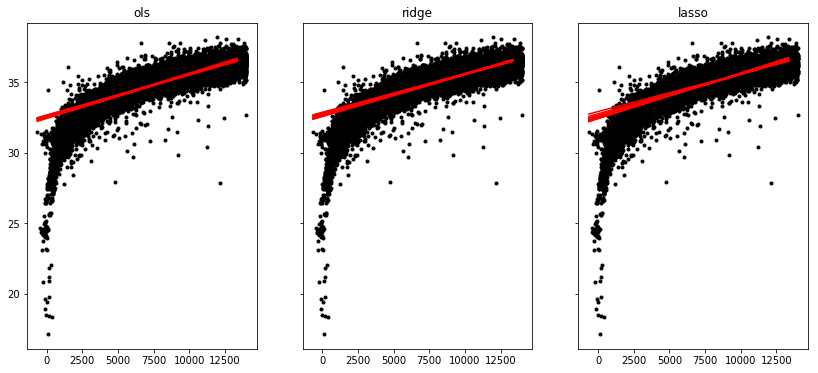

In [9]:
from collections import defaultdict
regressors_coefs = defaultdict(list)

regressors = dict(
    ols=LinearRegression(), ridge=Ridge(alpha=0.001), lasso=Lasso(alpha=0.001)
)
reg_slopes = {}

fig, axs = plt.subplots(1,3, sharey=True, figsize=(14,6))

iX_data = np.arange(min(X), max(X), 1000)

for k, ax in enumerate(axs.reshape(-1)):
    name = list(regressors.keys())[k]
    ireg = list(regressors.values())[k]
    print(f'> Running {name} with {ireg}')

    ax.plot(X, y, 'k.')
    
    for i in range(10):
        iX_train, iX_test, iy_train, iy_test = train_test_split(X[sel_indcs], 
                                                                y[sel_indcs],
                                                                test_size=0.3) 

        ireg.fit(iX_train, iy_train)
        iy_pred = ireg.predict(iX_test.reshape(-1, 1))
#        ax.plot(iX_test, iy_pred, '--r') 
        regressors_coefs[name].append(ireg.coef_[0])
        
        ax.plot(iX_data, ireg.predict(iX_data.reshape(-1,1)), '-r')         

#    ax.plot(X[sel_indcs], y[sel_indcs], 'k.')
    ax.set_title(name)
    
plt.show()    

### Q. What do you notice? 

- the linear function does not fit the points here regardless the regularization (which might help in some cases). 
- Not big differences, because the model is not good anyways. 

### Let's fit a polynomial

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures 

/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.18048e-31): result may not be accurate.
  overwrite_a=True).T
/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.77531e-40): result may not be accurate.
  overwrite_a=True).T
/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.88418e-48): result may not be accurate.
  overwrite_a=True).T
/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.87257e-81): result may not be accurate.
  overwrite_a=True).T
/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3258.80

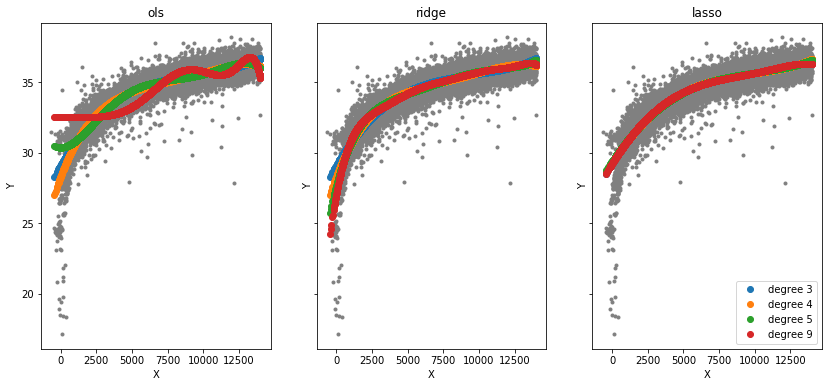

In [11]:
regressors = dict(
    ols=LinearRegression(), ridge=Ridge(alpha=0.001), lasso=Lasso(alpha=0.001)
)

X_train, X_test, y_train, y_test = train_test_split(X, y , 
                                                    test_size=0.3) 

fig, axs = plt.subplots(1,3, figsize=(14,6), sharey=True)

for k, ax in enumerate(axs.reshape(-1)):
    ax.plot(X, y, '.', color='gray')
    
    for degree in [3, 4, 5, 9]:
        model = make_pipeline(PolynomialFeatures(degree), list(regressors.values())[k])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        ax.plot(X_test, y_pred, 'o',  label=f"degree {degree}")
        
        ax.set_title(list(regressors.keys())[k])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

    
plt.legend()
plt.show()

### Q. Now what? 

- Obviously a polynomial is a more capable model. Already Ridge is doing a great work especially with increasing orders. Lasso is actually penalizing the same all orders, so it offers the opprotunity to use a simpler model than ridge.  
- add MSE ?

## A more general approach to linear regression

linear regression wrt to the weights and not the function
Introduce basis functions here

$linear$ regression when the function $f$ is linear with respect to the parameters, not with respect to the variable $x$! For example, the function:

$$f (x|θ ) = \sum^k_{p=1} θ_p g_p(x) = θ_1 g_1(x) + θ_2 g_2(x)~+~...~+~θ_k g_k(x) ~~~~~~ (3) $$

describes a linear problem as long as the sub-functions $g_p(x)$ do not depend on any of the parameters $θ_p$. 

The function described in Equation 3 does $not$ represent the most generic formulation of linear regression: it is just the form we will adopt in the reminder. An other example of suitable linear regression function is:

$$f (x|θ ) = θ_1 g^2(x) + θ_2 g(x)h(x) + θ_2 h^2(x) ~~~~~~ (4) $$

i.e. the important property is to be linear in $θ_p$.

### benefits of machine learning regression

Ideally, we would like to use a theoretically-derived funtion which could describe the observed distribution of the data. By fitting its parameters to the data we could simply preform the regression (we have seen this e.g. in the Bayesian session). However this is not always possible because e.g. we might be facing a new problem or because we are simply not satisfied by the available options in the literature. 

Even if we do not know the intrinsic form, we can still mimic any function by using a model $f (x|θ )$ composed of an arbitrary number of sub-functions, just like in Equation 3. One common approach is to use "Basis Functions", i.e. expand $f(x)$ over a _specific_ "family" of functions $g_p(x)$, for example a series of Gaussians with different means and variances.

How many functions do we need? We do cannot decide that a priori. The more functions we use, the better the model will fit the data, but the number of parameters increases (i.e. the size of $θ_p$) and so does the risk overfitting. 

That is why we need some techniques to dinamically constrain the model.

### application to hecate again with gaussian (other kernels?), + regularization (and kfold?)

In [23]:
Xdiff = []
for i in range(len(X)-1):
    Xdiff.append(X[i+1]-X[i])

In [25]:
print(np.mean(Xdiff[0]))

285.49999237060547


In [26]:
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

n_gaussians = 1000
centers = np.linspace(np.min(X), np.max(X), n_gaussians)
widths = 285

/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.94481e-81): result may not be accurate.
  overwrite_a=True).T
No handles with labels found to put in legend.


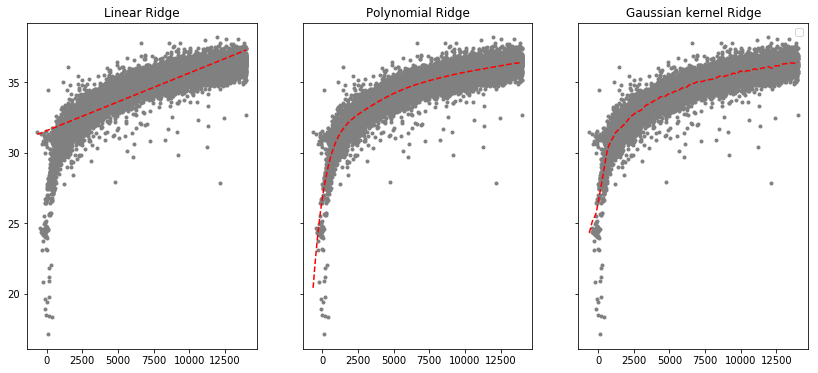

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


# models = dict(
# #    LinearReg=LinearRegression(), 
#     Ridge= Ridge(alpha=0.001),
#     PolyRidge=make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.001)),
# #    GaussRidge=make_pipeline( gaussian_basis(X[:, np.newaxis], centers, widths), Ridge(alpha=0.001))
    
# )

X_plot = np.linspace(np.min(X), np.max(X), 1000)[:, None]


X_train, X_test, y_train, y_test = train_test_split(X, y , 
                                            test_size=0.3, random_state=42) 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,6), sharey=True)



# text = ['Straight-line Regression',
#         '4th degree Polynomial\n Regression',
#         'Gaussian Basis Function\n Regression',
#         'Gaussian Kernel\n Regression']

# # number of constraints of the model.  Because
# # Nadaraya-watson is just a weighted mean, it has only one constraint
# n_constraints = [2, 5, len(basis_mu) + 1, 1]
# n_constraints = [2, 10, len(X_plot)+1]
# chi2_dof = (np.sum(((mu_sample_fit - mu_sample) / dmu) ** 2)
#                 / (len(mu_sample) - n_constraints[i]))


# Model 1: 
ax1. plot(X,y, '.', color='gray')
mdl1 =  Ridge(alpha=0.001)
#mdl1 = list(models.values())[0]
mdl1.fit(X_train, y_train)
#ax1.plot(X_test, mdl1.predict(X_test), 'o')
ax1.plot(X_plot, mdl1.predict(X_plot), '--r')
ax1.set_title('Linear Ridge')

# kr = GridSearchCV(
#     KernelRidge(kernel="rbf", gamma=0.1),
#     param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
# )

# Model 2
ax2.plot(X,y, '.', color='gray')
mdl2 = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.001)) #list(models.values())[1]
mdl2.fit(X_train, y_train)
#ax2.plot(X_test, mdl2.predict(X_test), 'o')
ax2.plot(X_plot, mdl2.predict(X_plot), '--r')
ax2.set_title('Polynomial Ridge')


# # Model 3
# ax3. plot(X,y, '.', color='gray')
# mdl3 = Ridge(alpha=0.001)
# gX_train = gaussian_basis(X_train, centers, widths)
# mdl3.fit( gX_train , y_train)
# gX_test = gaussian_basis(X_test, centers, widths)
# ax3.plot( X_test, mdl3.predict(gX_test), 'o')

from sklearn.kernel_ridge import KernelRidge

# Model 3
ax3. plot(X,y, '.', color='gray')
mdl3 = Ridge(alpha=0.001)
gX_train = gaussian_basis(X_train, centers, widths)
mdl3.fit( gX_train , y_train)
gX_test = gaussian_basis(X_test, centers, widths)
#ax3.plot( X_test, mdl3.predict(gX_test), 'o')

gX_plot = gaussian_basis(X_plot, centers, widths)
ax3.plot( X_plot, mdl3.predict( gX_plot ), '--r')
ax3.set_title('Gaussian kernel Ridge')

# mdl3 = GridSearchCV(
#     KernelRidge(kernel="rbf"),
#     param_grid={"alpha": [1e-2], "gamma": [0.01]} #np.logspace(-2, 2, 5)},

#     #param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
# )

# mdl3.fit(X_train, y_train)
# kr_fit = time.time() - t0
# print(f"Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")
# print(f"KRR complexity and bandwidth selected and model fitted in {kr_fit:0.3f}s")
# #mdl3 = KernelRidge(kernel="rbf", gamma=0.1)
# mdl3_pre = mdl3.predict(X_plot)
# kr_predict = time.time() - t0
# print(f"KRR prediction for {X_plot.shape[0]:d} inputs in {kr_predict:.3f}s")

# ax3.plot(X_plot, mdl3_pred, '--r')



# for ax in plt.gca(): 
#     pritn(ax)
# ax1.set_title(name)
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
# for ax in axes.flat:
#     print(ax)

#plt.ylimit(0,40)
plt.legend()
plt.show()    
    


[121.9000015258789,
 407.3999938964844,
 190.78704891689435,
 -28.502654178446576,
 -120.90238615297727,
 19.75383461124821,
 -97.4587672359209,
 174.1746807156176,
 -219.56616702837135,
 137.80719957253564,
 190.95573767460402,
 186.25562146949727,
 295.9770730921812,
 55.272525369307374,
 -312.1273122608766,
 -9.168299381377281,
 -271.79899246710477,
 61.599998474121094,
 -100.27506471257095,
 -29.69682715496208,
 -15.878909823258326,
 -241.76987250691764,
 -353.03026105255947,
 -287.44154678044447,
 -126.59454039679558,
 -247.79833936539765,
 -218.67338177026616,
 -125.65459128669978,
 -92.88051604244836,
 -393.9215264775145,
 -178.83058593955343,
 -16.155655711724066,
 -146.52945179592086,
 -57.93001392183436,
 -160.38568276316872,
 -207.98714186153714,
 -94.99612814964054,
 64.05685158213119,
 -73.90917505565687,
 -376.71168219534906,
 -190.38212356781887,
 120.93014952765604,
 -83.1023264004034,
 -111.85473654624047,
 -68.50329419937873,
 -447.5911404732782,
 -94.97086767450263,


In [85]:
import random

random.seed(134)
sel_Xinds = random.sample(range(len(X)), 250)

print(f'Selecting {len(sel_Xinds)} from the full length of {len(X)} points.')
#print(sel_Xinds)
XX = X[sel_Xinds]
yy = y[sel_Xinds]

gXX = gaussian_basis(XX, centers, widths)

X_plot = np.linspace(np.min(X), np.max(X), 100)[:, None]
gX_plot = gaussian_basis(X_plot, centers, widths)

Selecting 250 from the full length of 21174 points.


-- working with Linear_Regression
[ 3.87326588e+13 -4.82238132e+13 -1.45420721e+13 -2.87914746e+13
  1.76486673e+13  1.76422745e+13  1.53272030e+13  1.40454142e+13
  1.50741607e+13  2.50452270e+13]
-- working with Ridge_Regression
[ 2.45125207  2.15070846  1.83509838  1.50738471  1.1708198   0.82891107
  0.48538036  0.14411718 -0.19087344 -0.51552805]
-- working with Lasso_Regression


/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09883596598555755, tolerance: 0.08538267146734403
  positive)


[ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


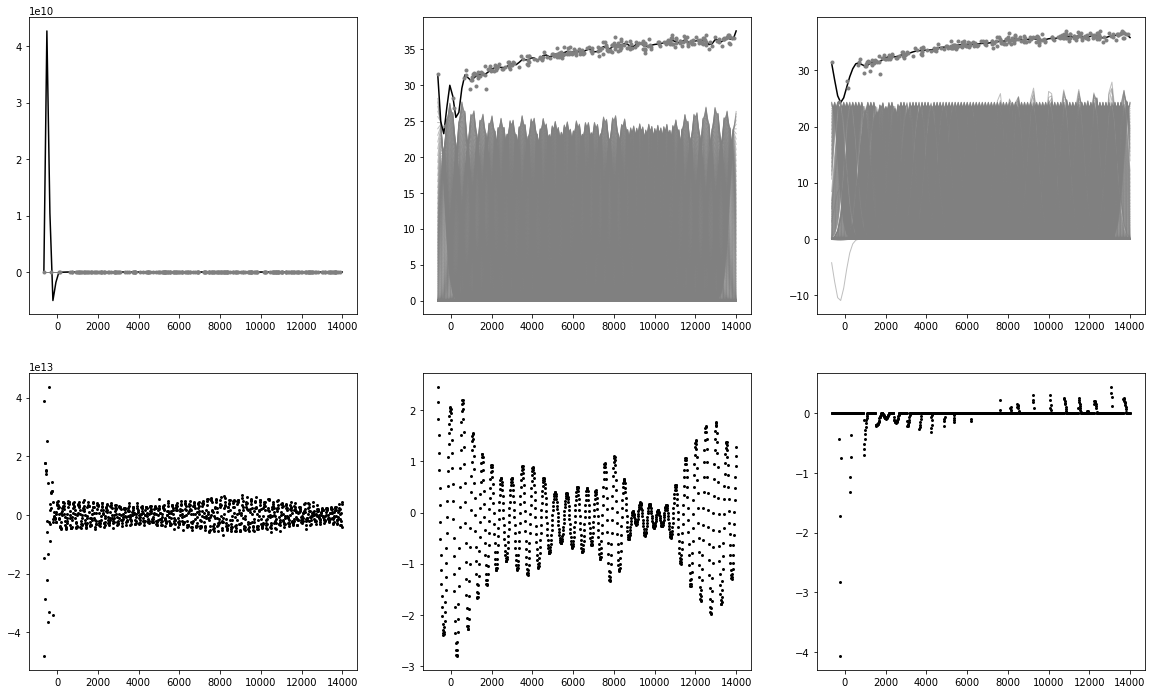

In [87]:
models = dict(    
    Linear_Regression = LinearRegression(), 
    Ridge_Regression  = Ridge(alpha=0.001),
    Lasso_Regression  = Lasso(alpha=0.001, max_iter=2000) # positive=True
) 

fig = plt.figure(figsize=(20, 12))
#fig = plt.subplots(1,3, figsize=(14,6), sharey=True)


for i in range(3):
    name = list(models.keys())[i]
    clf = list(models.values())[i] #classifier[i](fit_intercept=False, **kwargs[i])
    print(f'-- working with {name}')
    clf.fit(gXX, yy)
    w = clf.coef_

    print(w[:10])
    fit = clf.predict( gX_plot)
    
    # plot fit
    ax = fig.add_subplot(231 + i)
#     ax.xaxis.label.set_size(20)
#     ax.yaxis.label.set_size(20)
#     ax.tick_params(axis='both', which='major', labelsize=20)
#     ax.xaxis.set_major_formatter(plt.NullFormatter())

#     # plot curves for regularized fits
#     if i == 0:
#         ax.set_ylabel('$f_{v}$ [Jy]')
#     else:
#         ax.yaxis.set_major_formatter(plt.NullFormatter())
    axis_ymin, axis_ymax = min(yy), max(yy)
    w_plot = (0.3 * w / max(w)) * (axis_ymax - axis_ymin) + axis_ymin
    curves = w_plot * gX_plot

    ax.plot(X_plot, curves, c='gray', lw=1, alpha=0.5)

    
#     # NOTE: converting map to list or else plotting won't work
    
    ax.plot(X_plot, fit, '-k')
    
    ax.plot(XX,yy, '.', color='gray')

#    ax.scatter(X_plot, y, fmt='.k', ecolor='gray', lw=1, ms=4)
#     ax.set_xlim(np.min(wave),np.max(wave))
#     ax.set_ylim(np.min(flux),np.max(flux))
#     ax.text(0.05, 0.93, labels[i],
#             size=20,
#             ha='left', va='top',
#             bbox=dict(boxstyle='round', ec='k', fc='w'),
#             transform=ax.transAxes) 
    
  
    
#     # plot weights
    ax = plt.subplot(234 + i)
#     ax.xaxis.label.set_size(20)
#     ax.yaxis.label.set_size(20)
#     ax.tick_params(axis='both', which='major', labelsize=20)
#     #ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#     ax.set_xlabel('$\lambda$ [A]')
#     if i == 0:
#         ax.set_ylabel(r'$\theta$')
#         w *= 1E-12
#         ax.text(0, 1.01, r'$\rm \times 10^{12}$',
#                 transform=ax.transAxes)
    ax.scatter(centers, w, s=9, lw=0, c='k')

#     ax.set_xlim(np.min(centers), np.max(centers))

#     ax.set_ylim(np.min(w), np.max(w))

#     ax.text(0.05, 0.93, labels[i],
#             size=20,
#             ha='left', va='top',
#             bbox=dict(boxstyle='round', ec='k', fc='w'),
#             transform=ax.transAxes)

plt.show()

## A. EXERCISE: Use regression to fit and subtract galaxy continuum

In previous sessions (e.g. Introduction and MCMC) we have explored some methods to fit spectral lines.
In this exercise, we want to isolate the spectral emission lines of a late-type galaxy (e.g. a spiral) by removing the stellar continuum from the spectrum.

This procedure represents a very common step in the spectral data reductions, and it is performed through a variety of methods. The simplest approaches focus on a line at a time, removing only the local continuum by fitting it e.g. with a polynomial. Sophisticated methods fit the whole spectrum using appropriate stellar population templates. Here we will use linear regression as a quick method to obtain a fast continuum subtraction without dealing with detailed tuning.

We will use an optical spectrum from SDSS from the
[Spectral cross-correlation templates](http://classic.sdss.org/dr5/algorithms/spectemplates/)

### TASK A.1: Use the Gaussian Basis expansion and the Ridge/LASSO regularization to fit the spectrum

HINT: Try to run the regression with the full spectrum, and then removing the features we are most interested in isolating.

### TASK A.2: Compare your results with the background-subtracted spectrum distributed along with the SDSS data

### Loading the SDSS spectrum

In [8]:
# LOADING THE SDSS SPECTRUM
#
# To understand the SDSS file format, consult:
#   http://www.sdss2.org/dr3/dm/flatFiles/spSpec.html

# FITS manipulation:
from astropy.io import fits

PATH_spectrum = "data/late-type.fits"
    
hdulist = fits.open(PATH_spectrum)
data = hdulist[0].data
# Header keywords to perform wavelength calibration:
coeff0 = hdulist[0].header['coeff0']
coeff1 = hdulist[0].header['coeff1']
spectrum_flux  = data[0] # observed spectrum
spectrum_noBG  = data[1] # contimuum-subtracted spectrum
hdulist.close()

spectrum_flux = spectrum_flux[:-100]
spectrum_noBG = spectrum_noBG[:-100]
# NOTE: Removing last 100 data points, which are bogus

# Creating arbitrary uncertainty array proportional to the flux:
spectrum_flux_err = spectrum_flux * np.random.uniform(0.01, 0.1, size=len(spectrum_flux))

# Creating wavelength array using header calibrations:
spectrum_wave = 10.0 ** (coeff0 + coeff1 * np.arange(len(spectrum_flux)))

### Plotting the spectrum

In plotting, we will highlight 2 strong lines in the spectrum

In [9]:
# Defining ranges of strong features:
#   http://astronomy.nmsu.edu/drewski/tableofemissionlines.html
feature_0 = [6550, 6580] # H_alpha 6562.819
feature_1 = [6710, 6750] # SII 6730.810
# wavelength min and max for each feature [A]

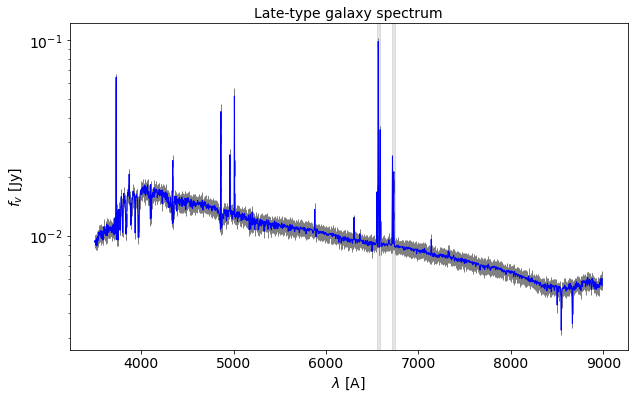

In [23]:
# > Displaying spectrum:    
fig = plt.figure(figsize=(10, 6))
# fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

# ax = plt.subplot(111)

plt.title('Late-type galaxy spectrum', fontsize=14)

plt.xlabel('$\lambda$ [A]', fontsize=14)
plt.ylabel('$f_{v}$ [Jy]',  fontsize=14)
#
plt.yscale('log')

plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.gca().tick_params(axis = 'both', which = 'minor', labelsize = 14)

plt.errorbar(spectrum_wave, spectrum_flux, spectrum_flux_err, fmt='blue', ecolor='gray', lw=1, ms=4)

# Marking emission features:
plt.axvspan(feature_0[0], feature_0[1] , color='grey', alpha=0.2)
plt.axvspan(feature_1[0], feature_1[1],  color='grey', alpha=0.2)

plt.show()

### RESPONSE TO A.1: Using the Gaussian Basis expansion and the Ridge/LASSO regularization to fit the spectrum


In [11]:
# REMOVING FEATURES FROM DATA
#
# We remove the wavelength ranges corresponding to the features we want to isolate,
# to avoid that some of the Gaussians in the Gaussian Basis attempt to fit the features

valid_range = (((spectrum_wave < feature_0[0] ) | (spectrum_wave > feature_0[1])) &
               ((spectrum_wave < feature_1[0] ) | (spectrum_wave > feature_1[1])))
wave        = spectrum_wave[valid_range]
flux        = spectrum_flux[valid_range]
flux_err    = spectrum_flux_err[valid_range]

# Restore feature ranges in data:
# wave        = spectrum_wave
# flux        = spectrum_flux
# flux_err    = spectrum_flux_err

In [12]:
# MODEL PARAMETERS:

# Manually converting data to a gaussian basis:
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

n_gaussians = 100
centers = np.linspace(np.min(wave), np.max(wave), n_gaussians)
widths = 200

X = gaussian_basis(wave[:, np.newaxis], centers, widths)

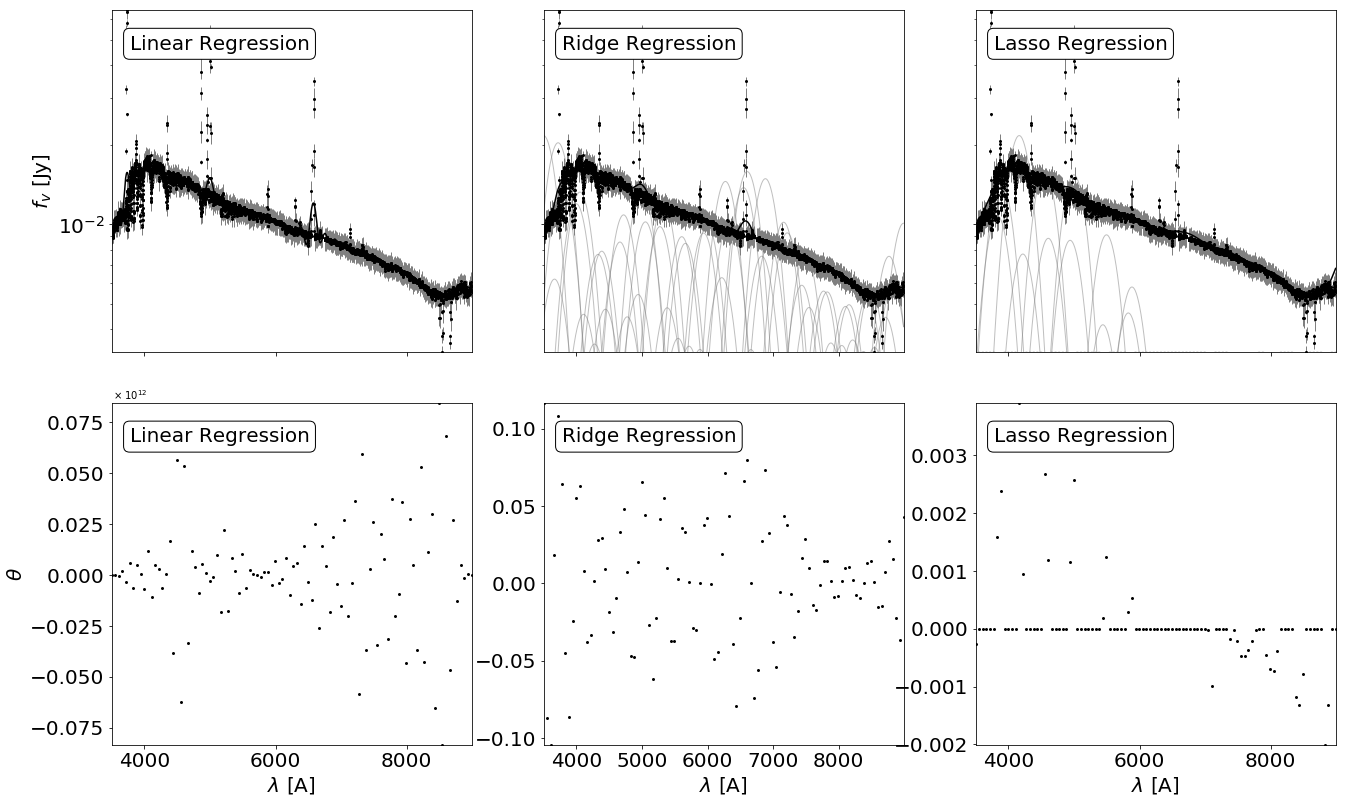

In [18]:
# NOTE: Most of the code in this block represents an edited version of:
# http://www.astroml.org/book_figures/chapter8/fig_rbf_ridge_mu_z.html#book-fig-chapter8-fig-rbf-ridge-mu-z

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# sampled array for plotting purposes
x_plot = np.linspace(np.min(wave), np.max(wave), 1000)

fig = plt.figure(figsize=(20, 12))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, hspace=0.15, wspace=0.2)

classifier = [LinearRegression, Ridge, Lasso]
kwargs = [dict(), dict(alpha=0.00005), dict(alpha=0.00001)]
labels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']


for i in range(3):
    clf = classifier[i](fit_intercept=True, **kwargs[i])
    clf.fit(X, flux)
    w = clf.coef_
    fit = clf.predict(gaussian_basis(x_plot[:, None], centers, widths))
   
    # plot fit
    ax = fig.add_subplot(231 + i)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    #
    ax.set_yscale('log')

    # plot curves for regularized fits
    if i == 0:
        ax.set_ylabel('$f_{v}$ [Jy]')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        axis_ymin, axis_ymax = min(flux), max(flux)
        w_plot = (0.3 * w / max(w)) * (axis_ymax - axis_ymin) + axis_ymin
        curves = w_plot * gaussian_basis(x_plot[:, np.newaxis], centers, widths)

        ax.plot(x_plot, curves, c='gray', lw=1, alpha=0.5)
    
    # NOTE: converting map to list or else plotting won't work
    
    ax.plot(x_plot, fit, '-k')

    ax.errorbar(wave, flux, flux_err, fmt='.k', ecolor='gray', lw=1, ms=4)
    ax.set_xlim(np.min(wave),np.max(wave))
    ax.set_ylim(np.min(flux),np.max(flux))
    ax.text(0.05, 0.93, labels[i],
            size=20,
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)
    
    
    # plot weights
    ax = plt.subplot(234 + i)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.set_xlabel('$\lambda$ [A]')
    if i == 0:
        ax.set_ylabel(r'$\theta$')
        w *= 1E-12
        ax.text(0, 1.01, r'$\rm \times 10^{12}$',
                transform=ax.transAxes)
    ax.scatter(centers, w, s=9, lw=0, c='k')

    ax.set_xlim(np.min(centers), np.max(centers))

    ax.set_ylim(np.min(w), np.max(w))

    ax.text(0.05, 0.93, labels[i],
            size=20,
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)

plt.show()

In [ ]:
### RESPONSE TO A.2: Comparing background subtraction with SDSS results

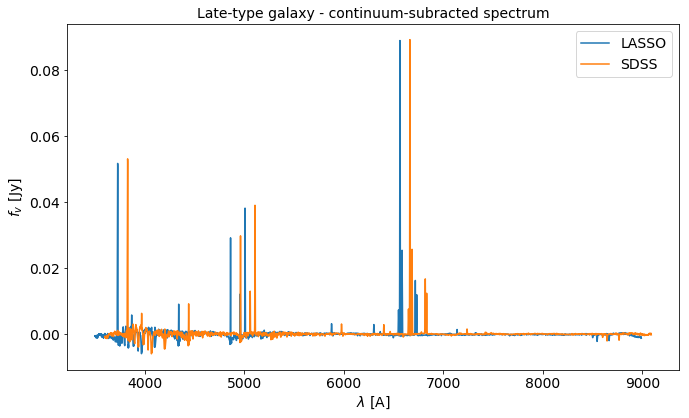

In [19]:
# RESAMPLING LASSO FITTED CURVE TO DATA
#
# In order to plot the fitting curve produced by the classifier ("fit")
#   along with "spectrum_flux", we first resample it to the same
#   array, i.e. "sample_wave"
# This is because "fit" has been sampled on "x_plot", which has
#   a different sampling than "spectrum_wave"

from scipy.interpolate import interp1d

clf = classifier[2](fit_intercept=True, **kwargs[i]) # LASSO
clf.fit(X, flux)

fit = clf.predict(gaussian_basis(x_plot[:, None], centers, widths))

f = interp1d(x_plot, fit, kind='cubic')
# interpolation function
# - linear
# - quadratic
# - cubic
fit_interp = f(spectrum_wave) 


# PLOTTING

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# > Displaying spectrum:    
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

ax = plt.subplot(111)

ax.set_title('Late-type galaxy - continuum-subracted spectrum', fontsize=14)

ax.set_xlabel('$\lambda$ [A]', fontsize=14)
ax.set_ylabel('$f_{v}$ [Jy]', fontsize=14)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)

ax.plot(spectrum_wave,     spectrum_flux - fit_interp, label='LASSO')
ax.plot(spectrum_wave+100, spectrum_noBG,              label='SDSS')

ax.legend(fontsize=14)

plt.show()

NOTE: The SDSS spectrum have been arbitrarily shifted for presentation purposes

In [111]:
# some tests

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

MSE = cross_val_score(reg, X[sel_indcs].reshape(-1,1), y[sel_indcs], scoring="neg_mean_squared_error", cv=5)

meanMSE = np.mean(MSE)
print(meanMSE)

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
for rg in [Ridge(), Lasso()]:
    print(rg)
    rg_reg = GridSearchCV(rg, parameters, scoring="neg_mean_squared_error", cv=5 )
    rg_reg.fit(X[sel_indcs].reshape(-1,1), y[sel_indcs])
    print(rg_reg.best_params_)
    print(rg_reg.best_score_)
    

-0.23055330057953385
Ridge()
{'alpha': 20}
-0.23055310707535925
Lasso()
{'alpha': 20}
-0.22730737680093044


/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4143111342151931, tolerance: 0.001063294975499999
  positive)
/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.59270228535639, tolerance: 0.0014115781835
  positive)
/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28538988856182845, tolerance: 0.0008404040940000016
  positive)
/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase 

In [102]:
print(MSE)

[-5.91166515 -0.62306042 -0.61376559 -0.52480421 -0.47850214]


In [56]:
for name, coefs in regressors_coefs.items():
    print(name, np.std(coefs, ddof=1))

ols 2.2127452862347194e-05
ridge 2.0017952200386456e-05
lasso 2.0832333258070818e-05
